In [37]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
import sklearn
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [28]:
data = pd.read_csv('../nlp-labs/tobacco-lab/data/Tobacco3482.csv')
data.head(10)

,img_path,label
0,Advertisement/0000136188.jpg,Advertisement
1,Advertisement/0000435350.jpg,Advertisement
2,Advertisement/0000556056.jpg,Advertisement
3,Advertisement/0030048095.jpg,Advertisement
4,Advertisement/0030048989.jpg,Advertisement
5,Advertisement/0030049569.jpg,Advertisement
6,Advertisement/03496270.jpg,Advertisement
7,Advertisement/03567810.jpg,Advertisement
8,Advertisement/03722789.jpg,Advertisement
9,Advertisement/04102204.jpg,Advertisement


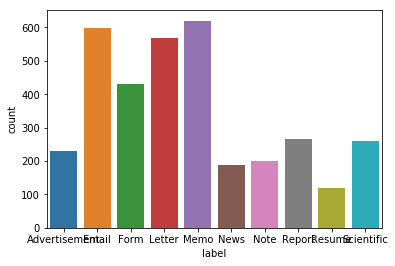

In [29]:
g = sns.countplot(data['label'],orient='h')
g

In [30]:
list_files = []
for root, dirs, files in os.walk("./data", topdown=False):
    for name in files:
        if ".txt" in os.path.join(root, name) :
            list_files.append(os.path.join(root, name))

list_text = []
for file in list_files:
    file_object = open(file,'r')
    list_text.append(file_object.read())
    

In [31]:
dict_data = {}
for i in range(len(data['img_path'])):
    dict_data['../nlp-labs/tobacco-lab/data/'+data['img_path'][i].replace('jpg','txt')] = data['label'][i] 
X = []
y = []
for i in dict_data:
    file_object = open(i,"r")
    X.append(file_object.read())
    file_object.close()
    y.append(dict_data[i])

In [32]:

X_train, X_test,y_train,  y_test = train_test_split(X,y, test_size=0.2)
X_train, X_dev, y_train, y_dev = train_test_split(X_train, y_train, test_size = 0.25)

In [33]:

def model_NB_train(X_train,y_train,max_features = 2000):
    # On vectorize nos tweets
    vectorizer = CountVectorizer(max_features=2000)
    vectorizer.fit(X_train)
    X_train_counts = vectorizer.transform(X_train)
    
    # On entraine nos Naives Bayes
    model = MultinomialNB()
    model.fit(X_train_counts,y_train)

    y_pred_train = model.predict(X_train_counts)
   
    print("Evalution (Phase de train) : ",accuracy_score(y_train,y_pred_train))
    return model,vectorizer

def model_NB_test(model,vectorizer,X_test,y_test):
    
    X_test_counts = vectorizer.transform(X_test)

    y_pred_test = model.predict(X_test_counts)
    
    print("Evalution (Phase de test) : ",accuracy_score(y_test,y_pred_test),"\n")
    print(classification_report(y_test,y_pred_test))
    print(confusion_matrix(y_test,y_pred_test))
    return model

model,vectorizer = model_NB_train(X_train,y_train)
model_NB_test(model,vectorizer,X_test,y_test)


Evalution (Phase de train) :  0.8309386973180076
Evalution (Phase de test) :  0.7374461979913917 

               precision    recall  f1-score   support

Advertisement       0.77      0.65      0.71        55
        Email       0.95      0.95      0.95       110
         Form       0.72      0.80      0.76        85
       Letter       0.74      0.70      0.72       116
         Memo       0.66      0.76      0.70       113
         News       0.60      0.81      0.69        36
         Note       0.54      0.36      0.43        39
       Report       0.57      0.55      0.56        62
       Resume       1.00      1.00      1.00        29
   Scientific       0.78      0.62      0.69        52

    micro avg       0.74      0.74      0.74       697
    macro avg       0.73      0.72      0.72       697
 weighted avg       0.74      0.74      0.73       697

[[ 36   0   3   2   5   5   3   1   0   0]
 [  0 105   0   1   1   0   0   3   0   0]
 [  3   0  68   3   3   2   5   0   0   1]

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

# Commentaires 

Pas de soucis pour retrouver les CVs, ça il y arrive bien. 

In [34]:
model = MLPClassifier(activation='logistic')

X_train_counts = vectorizer.transform(X_train)
X_test_counts = vectorizer.transform(X_test)

model.fit(X_train_counts,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [35]:
y_pred_train = model.predict(X_train_counts)
print("Evalution (Phase de train) : ",accuracy_score(y_train,y_pred_train))
y_pred_test = model.predict(X_test_counts)
    
print("Evalution (Phase de test) : ",accuracy_score(y_test,y_pred_test),"\n")
print(classification_report(y_test,y_pred_test))
print(confusion_matrix(y_test,y_pred_test))


Evalution (Phase de train) :  0.9966475095785441
Evalution (Phase de test) :  0.7546628407460545 

               precision    recall  f1-score   support

Advertisement       0.66      0.67      0.67        55
        Email       0.95      0.97      0.96       110
         Form       0.75      0.82      0.79        85
       Letter       0.75      0.72      0.73       116
         Memo       0.78      0.81      0.80       113
         News       0.73      0.67      0.70        36
         Note       0.53      0.64      0.58        39
       Report       0.53      0.45      0.49        62
       Resume       1.00      1.00      1.00        29
   Scientific       0.69      0.60      0.64        52

    micro avg       0.75      0.75      0.75       697
    macro avg       0.74      0.74      0.73       697
 weighted avg       0.75      0.75      0.75       697

[[ 37   0   3   0   0   2  11   1   0   1]
 [  1 107   0   0   2   0   0   0   0   0]
 [  3   0  70   4   1   1   4   0   0   2]

In [42]:
# Hyperameters optimization with GridSearchCV = parallel processing
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from pprint import pprint
from time import time
import logging
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s %(levelname)s %(message)s')


pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('mlp', MLPClassifier()),
])


parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'mlp__activation': ( 'logistic', 'relu')
}
if __name__ == "__main__":
    # multiprocessing requires the fork to happen in a __main__ protected
    # block

    # find the best parameters for both the feature extraction and the
    # classifier
    grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, verbose=2)

    print("Performing grid search...")
    print("pipeline:", [name for name, _ in pipeline.steps])
    print("parameters:")
    pprint(parameters)
    t0 = time()
    grid_search.fit(X_test_counts, y_test)
    print("done in %0.3fs" % (time() - t0))
    print()

    print("Best score: %0.3f" % grid_search.best_score_)
    print("Best parameters set:")
    best_parameters = grid_search.best_estimator_.get_params()
    for param_name in sorted(parameters.keys()):
        print("\t%s: %r" % (param_name, best_parameters[param_name]))

Performing grid search...
pipeline: ['vect', 'mlp']
parameters:
{'mlp__activation': ('logistic', 'relu'), 'vect__max_df': (0.5, 0.75, 1.0)}
Fitting 3 folds for each of 6 candidates, totalling 18 fits


/home/tbernard/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


AttributeError: lower not found